# Solving the Ground Energy of $BeH_2$ in small QPU using a reduction method

In this tutorial, we are going to show the details of the procedure introduced by [A. Kandala et al](https://www.nature.com/articles/nature23879) to approximate and reduce the hamiltonian of $BeH2$ molecule.

## Second Quantized Hamiltonian

Some notes to remind from Kandala et al:

1. The molecular Hamiltonians considered in this work are computed in the STO-3G basis.
1. The STO-3G minimal basis is obtained by fitting three gaussians to the Slater atomic orbitals, and commonly used in quantum chemistry because of the efficiency in obtaining electronic integrals.
1. For the H2 molecule, each atom contributes a 1s orbital, for a total of 4 spin-orbitals.
1. We set the X axis as the interatomic axis for the LiH and BeH2 molecules, and consider the orbitals 1s for each H atom and $1s$, $2s$, $2px$ for the Li and Be atoms, assuming zero filling for the $2py$ and $2pz$ orbitals, which do not interact strongly with the subset of orbitals considered. This choice of orbitals amounts to a total of 8 spin-orbitals for LiH and 10 for BeH2. The Hamiltonians are expressed using the second quantization language,

$$H = H_0 + H_1 + H_2 = c + \sum_{\alpha \beta = 1}^M t_{\alpha \beta} a^\dagger_\alpha a_\beta + \frac{1}{2}\sum_{\alpha\beta\gamma\delta = 1}^M u_{\alpha\beta\gamma\delta} a^\dagger_\alpha a^\dagger_\gamma a_\delta a_\beta$$

$H_0 = c$ is the nuclear repulsion energy.

Here $M = 10$ is the number of spin-orbitals for $BeH_2$ respectively, and we have used the chemists’ notation for the two-body integrals

### Computing $t_{\alpha \beta}$ and $u_{\alpha \beta \gamma \delta}$

In [33]:
import openfermion as of
import openfermionpyscf as ofpyscf
from openfermionpyscf import run_pyscf
from openfermion import MolecularData
from openfermion.transforms import jordan_wigner, get_fermion_operator, bravyi_kitaev

#### Define the molecule

In [9]:
# Set molecule parameters
dist = 1.5
geometry = [["H", [-dist, 0.0, 0.0]], ["Be", [0.0, 0.0, 0.0]], ["H", [dist, 0.0, 0.0]]]
basis = "sto-3g"
multiplicity = 1
charge = 0

# define molecule
molecule = MolecularData(geometry, basis , multiplicity , charge)
molecule = run_pyscf(
    molecule,
    run_mp2=True,
    run_cisd=True ,
    run_ccsd=True ,
    run_fci=True
)

$t_{\alpha \beta}$ and $u_{\alpha \beta \gamma \delta}$ are obtained by computing the one-body and two-body electron integrals:

In [10]:
two_body_int = molecule.two_body_integrals

In [11]:
one_body_int = molecule.one_body_integrals

To get the second quantized hamiltonian, we can use the available modules.

1. Note: The indexing convention used is that even indices correspond to spin-up (alpha) modes and odd indices correspond to spin-down (beta) modes.
1. We consider 5 orbitals: 10 fermionic modes

In [12]:
# hamiltonian
# spin-orbitals : Be (1s 2s 2px) H(1s) H(1s) 

hamiltonian = molecule.get_molecular_hamiltonian(active_indices=[0, 1, 2, 3, 4])

In [13]:
h0 = of.ops.InteractionOperator(hamiltonian.constant, hamiltonian.one_body_tensor * 0, hamiltonian.two_body_tensor * 0)
h1 = of.ops.InteractionOperator(0, hamiltonian.one_body_tensor, hamiltonian.two_body_tensor * 0)
h2 = of.ops.InteractionOperator(0, hamiltonian.one_body_tensor *0, hamiltonian.two_body_tensor)

$H_0 =$

In [14]:
print(h0)

() 2.99867086188



$H_1 =$

In [15]:
print(h1)

() 0
((0, 1), (0, 0)) -8.56127703426505
((0, 1), (2, 0)) 0.21201345845918046
((1, 1), (1, 0)) -8.56127703426505
((1, 1), (3, 0)) 0.21201345845918046
((2, 1), (0, 0)) 0.21201345845918027
((2, 1), (2, 0)) -2.340267826204151
((3, 1), (1, 0)) 0.21201345845918027
((3, 1), (3, 0)) -2.340267826204151
((4, 1), (4, 0)) -2.283826526967182
((5, 1), (5, 0)) -2.283826526967182
((6, 1), (6, 0)) -2.244934999034438
((7, 1), (7, 0)) -2.244934999034438
((8, 1), (8, 0)) -2.244934999034438
((9, 1), (9, 0)) -2.244934999034438



$H_2$

In [16]:
print(h2)

() 0
((0, 1), (0, 1), (0, 0), (0, 0)) 1.135885903604346
((0, 1), (0, 1), (0, 0), (2, 0)) -0.09469073567800627
((0, 1), (0, 1), (2, 0), (0, 0)) -0.09469073567800641
((0, 1), (0, 1), (2, 0), (2, 0)) 0.012162753812018366
((0, 1), (0, 1), (4, 0), (4, 0)) 0.002631642619372051
((0, 1), (0, 1), (6, 0), (6, 0)) 0.00787691696821518
((0, 1), (0, 1), (8, 0), (8, 0)) 0.00787691696821518
((0, 1), (1, 1), (1, 0), (0, 0)) 1.135885903604346
((0, 1), (1, 1), (1, 0), (2, 0)) -0.09469073567800627
((0, 1), (1, 1), (3, 0), (0, 0)) -0.09469073567800641
((0, 1), (1, 1), (3, 0), (2, 0)) 0.012162753812018366
((0, 1), (1, 1), (5, 0), (4, 0)) 0.002631642619372051
((0, 1), (1, 1), (7, 0), (6, 0)) 0.00787691696821518
((0, 1), (1, 1), (9, 0), (8, 0)) 0.00787691696821518
((0, 1), (2, 1), (0, 0), (0, 0)) -0.09469073567800641
((0, 1), (2, 1), (0, 0), (2, 0)) 0.012162753812018366
((0, 1), (2, 1), (2, 0), (0, 0)) 0.2325438418096617
((0, 1), (2, 1), (2, 0), (2, 0)) -0.002968138332889151
((0, 1), (2, 1), (4, 0), (4, 0)) 0

### $t_{\alpha \beta}$ matrix

In [17]:
t = hamiltonian.one_body_tensor

In [18]:
t.shape

(10, 10)

### Bogoliubov transformation and energy shift

In the case of LiH and BeH2, we then consider perfect filling for the inner 1s orbitals, dressed in the basis in which $H_1$ is diagonal. 


We diagonalize $H_1$ using Bogoliubov transformation $${a'}_\alpha = \sum_\beta U_{\alpha \beta} a_\beta$$

\begin{align}
H_1 &= \sum_{\alpha \beta} t_{\alpha \beta} a^\dagger_\alpha a_\beta\\
&= U^\dagger D_1 U\\
&= \sum_a {w'}_{a} {a'}^\dagger_a {a'}_a\\
&= \sum_a {w'}_a \sum_\alpha U^\dagger_{\alpha a} a^\dagger_\alpha \sum_{\beta} U_{a\beta} a_\beta \\
&= \sum_{\alpha \beta} \underbrace{\sum_a U^\dagger_{\alpha a}{w'}_a U_{a\beta}}_{t_{\alpha \beta}} a^\dagger_\alpha a_\beta
\end{align}


In [19]:
import numpy as np

In [20]:
eig = np.linalg.eig(t)
U = eig[1].T.conjugate()
w = U @ t @ U.T.conjugate()

In [25]:
print('Bogoliubov transformation\n ------------------')
print(f'w diagonal values = {eig[0]}\n')
#print(f'U = \n {U}\n')
#print(f'w = \n {w}\n')

Bogoliubov transformation
 ------------------
w diagonal values = [-8.56849413 -2.33305073 -8.56849413 -2.33305073 -2.28382653 -2.28382653
 -2.244935   -2.244935   -2.244935   -2.244935  ]



#### Computing ${u'}_{\alpha \beta \gamma \delta}$

$H_1 = U^\dagger D_1 U$
\begin{align}
H_2 &= \frac{1}{2} \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} a_\alpha^\dagger a_\gamma^\dagger a_\delta a_\beta\\
&= \frac{1}{2} \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} \sum_a U_{a\alpha} {a'}_a^\dagger \sum_{c} U_{c\gamma} {a'}_c^\dagger \sum_d U^\dagger_{\delta d} {a'}_d \sum_b U^\dagger_{\beta b} {a'}_b\\
&= \frac{1}{2} \sum_{abcd} \underbrace{\sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} U_{a\alpha}  U_{c\gamma} U^\dagger_{\delta d} U^\dagger_{\delta d}}_{{u'}_{abcd}} {a'}_a^\dagger {a'}_c^\dagger {a'}_d {a'}_b
\end{align}

\begin{align}
{u'}_{abcd} &= \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} U_{a\alpha}  U_{c\gamma} U^\dagger_{\delta d} U^\dagger_{\delta d}
\end{align}

$\frac{1}{2}u = $

In [26]:
u = hamiltonian.two_body_tensor

In [27]:
u.shape

(10, 10, 10, 10)

#### Computing ${u'}_{\alpha \beta \gamma \delta}$

In [28]:
u_prime = u * 0

In [29]:
def iterate(nmax, nb_digits):
    dinary = []
    final = []
    for _ in range(nb_digits):
        dinary.append(0)
        final.append(nmax)
    
    yield dinary
    
    while dinary != final:
        
        for _, digit in enumerate(dinary):
            if digit < nmax:
                dinary[_] += 1
                break
            else:
                dinary[_] = 0
                
        yield dinary
    
    yield final

$H_1 = U^\dagger D_1 U$
\begin{align}
H_2 &= \frac{1}{2} \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} a_\alpha^\dagger a_\gamma^\dagger a_\delta a_\beta\\
&= \frac{1}{2} \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} \sum_a U_{a\alpha} {a'}_a^\dagger \sum_{c} U_{c\gamma} {a'}_c^\dagger \sum_d U^\dagger_{\delta d} {a'}_d \sum_b U^\dagger_{\beta b} {a'}_b\\
&= \frac{1}{2} \sum_{abcd} \underbrace{\sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} U_{a\alpha}  U_{c\gamma} U^\dagger_{\delta d} U^\dagger_{\delta d}}_{{u'}_{abcd}} {a'}_a^\dagger {a'}_c^\dagger {a'}_d {a'}_b
\end{align}

\begin{align}
{u'}_{abcd} &= \sum_{\alpha \beta \gamma \delta} u_{\alpha \beta \gamma \delta} U_{a\alpha}  U_{c\gamma} U^\dagger_{\delta d} U^\dagger_{\beta b}
\end{align}

Remark: This is the most time consuming part!

In [30]:
# CAUTION abcd here is acdb in formula

for a, c, d, b in iterate(9, 4):
    u_prime[a, c, d, b] = 0
    for alpha, gamma, delta, beta in iterate(9, 4):
        u_prime[a, c, d, b] += u[alpha, gamma, delta, beta] * U[a][alpha] * U[c][gamma] * U.T.conjugate()[delta][d] * U.T.conjugate()[beta][b]

#### Define $H$ in terms of Bogoliubov oeprators

In [34]:
hamiltonian_ = of.ops.InteractionOperator(hamiltonian.constant, w, u_prime)

In [35]:
hamiltonian_

() 2.99867086188
((0, 1), (0, 0)) -8.568494130172306
((0, 1), (1, 0)) 1.1102230246251565e-16
((0, 1), (2, 0)) 0.23065573876636497
((0, 1), (3, 0)) 1.9312351197398048e-19
((1, 1), (0, 0)) 2.7755575615628914e-16
((1, 1), (1, 0)) -2.333050730296898
((1, 1), (2, 0)) 5.091413401991929e-16
((1, 1), (3, 0)) 0.00015594948908320022
((2, 1), (0, 0)) 0.23065573876636497
((2, 1), (1, 0)) 5.152128723651117e-16
((2, 1), (2, 0)) -8.568494130172308
((2, 1), (3, 0)) 5.551115123125783e-17
((3, 1), (0, 0)) 1.7872395187065737e-19
((3, 1), (1, 0)) 0.00015594948908320022
((3, 1), (2, 0)) 2.0816681711721685e-16
((3, 1), (3, 0)) -2.3330507302968964
((4, 1), (4, 0)) -2.283826526967182
((5, 1), (5, 0)) -2.283826526967182
((6, 1), (6, 0)) -2.244934999034438
((7, 1), (7, 0)) -2.244934999034438
((8, 1), (8, 0)) -2.244934999034438
((9, 1), (9, 0)) -2.244934999034438
((0, 1), (0, 1), (0, 0), (0, 0)) 1.1467162003850937
((0, 1), (0, 1), (0, 0), (1, 0)) 0.06429777060360922
((0, 1), (0, 1), (0, 0), (2, 0)) -0.0308685129

## Apply the approximation suggested by Kandal et al

We then consider the “dressed” 1s modes of Li and Be to be filled, efficiently obtaining an effective Hamiltonian
acting on generic states of the form $\left| \Psi\right\rangle = a^\dagger_{1s\uparrow} a^\dagger_{1s\downarrow} \sum_{\beta \neq 1s} c_\beta a^\dagger_\beta |0\rangle$.

According to this ansatz, the one-body fermionic terms containing the filled orbitals
will now contribute as a shift to the total energy (I here is the identity operator)

\begin{align}
{\omega'}_{1s \uparrow} {a'}^\dagger_{1s \uparrow} {a'}_{1s\uparrow} &\rightarrow {\omega'}_{1s\uparrow} I\\
{\omega'}_{1s \downarrow} {a'}^\dagger_{1s \downarrow} {a'}_{1s\downarrow} &\rightarrow {\omega'}_{1s\downarrow} I
\end{align}

some of the two-body interactions, containing the set F of 1s filled modes of Li and Be, F = {1s ↑, 1s ↓},
become effective one-body or energy shift terms:

\begin{align}
\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} {a'}^\dagger_{\alpha}{a'}^\dagger_{\gamma} {a'}_{\delta} {a'}_{\beta}\rightarrow \left\lbrace
\begin{array}{ll}
\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} {a'}^\dagger_{\gamma} {a'}_{\delta} & \alpha=\beta, \alpha\in[1s\uparrow, 1s\downarrow ] \text{ and } \gamma, \delta \notin [1s\uparrow, 1s\downarrow ]\\
\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} {a'}^\dagger_{\alpha}{a'}_{\beta} & \gamma=\delta, \gamma\in[1s\uparrow, 1s\downarrow ] \text{ and } \alpha, \beta \notin [1s\uparrow, 1s\downarrow ]\\
-\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} {a'}^\dagger_{\alpha} {a'}_{\delta} & \gamma=\beta, \gamma\in[1s\uparrow, 1s\downarrow ] \text{ and } \alpha, \delta \notin [1s\uparrow, 1s\downarrow ]\\
-\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} {a'}^\dagger_{\gamma} {a'}_{\beta} & \alpha=\delta, \alpha\in[1s\uparrow, 1s\downarrow ] \text{ and } \beta, \gamma \notin [1s\uparrow, 1s\downarrow ]\\
\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} I & \alpha=\beta, \gamma=\delta, \alpha \neq \gamma \text{ and } \alpha, \gamma\in[1s\uparrow, 1s\downarrow ]\\
-\frac{1}{2}{u'}_{\alpha\beta\gamma\delta} I & \alpha=\delta, \gamma=\beta, \alpha \neq \gamma \text{ and } \alpha, \gamma\in[1s\uparrow, 1s\downarrow ]
\end{array}
\right.
\end{align}

In [36]:
from copy import deepcopy

In [37]:
h_ = deepcopy(hamiltonian_)

In [38]:
# CAUTION 'a b c d' here are 'a c d b' in formula

F = [0, 1]
for a, c, d, b in iterate(9, 4):
    # a = b, a = [0, 1], c, d != [0, 1] 
    if a == b and a in F and not (c in F) and not (d in F):
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[((c, 1), (d, 0))] += u_prime[a, c, d, b]
    
    # c = d, c = [0, 1], a, b != [0, 1]
    elif c == d and c in F and not (a in F) and not (b in F):
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[((a, 1), (b, 0))] += u_prime[a, c, d, b]
    
    # c = b, c = [0, 1], a, d != [0, 1]
    elif c == b and c in F and not (a in F) and not (d in F):
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[((a, 1), (d, 0))] += -u_prime[a, c, d, b]
    
    # a = d, a = [0, 1], c, b != [0, 1]
    elif a == d and a in F and not (c in F) and not (b in F):
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[((c, 1), (b, 0))] += -u_prime[a, c, d, b]
    
    # a = b, c = d, ac = [0, 1], a != c
    elif a == b and a in F and c == d and c in F and a != c:
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[()] += u_prime[a, c, d, b]
    
    # a = d, c = b, ac = [0, 1], a != c
    elif a == d and a in F and c == b and c in F and a != c:
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
        h_[()] += -u_prime[a, c, d, b]
        
    # this is related to the next transformation
    # a = c = d = b = [0, 1]
    #elif a == c and b == d and a == b and a in F:
    #    h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0
    #    h_[()] += u_prime[a, c, d, b]
    
    # neglicting odd terms
    elif 0 in [a, c, d, b] or 1 in [a, c, d, b]:
        h_[((a, 1), (c, 1), (d, 0), (b, 0))] = 0.0



\begin{align}
{\omega'}_{1s \uparrow} {a'}^\dagger_{1s \uparrow} {a'}_{1s\uparrow} &\rightarrow {\omega'}_{1s\uparrow} I\\
{\omega'}_{1s \downarrow} {a'}^\dagger_{1s \downarrow} {a'}_{1s\downarrow} &\rightarrow {\omega'}_{1s\downarrow} I
\end{align}

In [39]:
for a, b in iterate(9, 2):
    if a == 0 and b == 0:
        h_[((a, 1), (b, 0))] = 0
        h_[()] += w[a, b]
    elif a == 1 and b == 1:
        h_[((a, 1), (b, 0))] = 0
        h_[()] += w[a, b]
    
    elif a in [0, 1] or b in [0, 1]:
        h_[((a, 1), (b, 0))] = 0

In [40]:
h_

() -7.462111822593917
((2, 1), (2, 0)) -5.822213366324245
((2, 1), (3, 0)) 0.13051338421279324
((3, 1), (2, 0)) 0.13051338421279343
((3, 1), (3, 0)) -1.4985306879605553
((4, 1), (4, 0)) -1.6267706177173578
((5, 1), (5, 0)) -1.461051786055488
((6, 1), (6, 0)) -1.3817556551205632
((7, 1), (7, 0)) -1.3181602407009563
((8, 1), (8, 0)) -1.3817556551205632
((9, 1), (9, 0)) -1.3181602407009563
((2, 1), (2, 1), (2, 0), (2, 0)) 1.1467162003850935
((2, 1), (2, 1), (2, 0), (3, 0)) 0.06427458571436587
((2, 1), (2, 1), (3, 0), (2, 0)) 0.06427458571436596
((2, 1), (2, 1), (3, 0), (3, 0)) 0.006874069362707583
((2, 1), (2, 1), (4, 0), (4, 0)) 1.6825762803174859e-06
((2, 1), (2, 1), (4, 0), (5, 0)) 6.248238402995355e-05
((2, 1), (2, 1), (5, 0), (4, 0)) 6.248238402995354e-05
((2, 1), (2, 1), (5, 0), (5, 0)) 0.00232028013216134
((2, 1), (2, 1), (6, 0), (6, 0)) 5.351671325868953e-06
((2, 1), (2, 1), (6, 0), (7, 0)) 0.00019873404070687247
((2, 1), (2, 1), (7, 0), (6, 0)) 0.00019873404070687247
((2, 1), (2,

Now, let's lower the indices of the fermionic modes operators. This will yield a hamiltonian of 8 fermionic modes only.

In [44]:
shifted_hamiltonian = deepcopy(h_)

F = [0, 1]
for a, b in iterate(9, 2):
    if not a in F and not b in F:
        shifted_hamiltonian[((a-2, 1), (b-2, 0))] = h_[((a, 1), (b, 0))]
    
    if a > 7 or b > 7 :
        shifted_hamiltonian[((a, 1), (b, 0))] = 0.0

for a, b, c, d in iterate(9, 4):
    if not a in F and not b in F and not c in F and not d in F:
        shifted_hamiltonian[((a-2, 1), (b-2, 1), (c-2, 0), (d-2, 0))] = h_[((a, 1), (b, 1), (c, 0), (d, 0))]
    
    if a > 7 or b > 7 or c > 7 or d > 7:
        shifted_hamiltonian[((a, 1), (b, 1), (c, 0), (d, 0))] = 0.0

shifted_h0 = shifted_hamiltonian.constant
shifted_h1 = shifted_hamiltonian.one_body_tensor
shifted_h2 = shifted_hamiltonian.two_body_tensor

In [45]:
shifted_hamiltonian

() -7.462111822593917
((0, 1), (0, 0)) -5.822213366324245
((0, 1), (1, 0)) 0.13051338421279324
((1, 1), (0, 0)) 0.13051338421279343
((1, 1), (1, 0)) -1.4985306879605553
((2, 1), (2, 0)) -1.6267706177173578
((3, 1), (3, 0)) -1.461051786055488
((4, 1), (4, 0)) -1.3817556551205632
((5, 1), (5, 0)) -1.3181602407009563
((6, 1), (6, 0)) -1.3817556551205632
((7, 1), (7, 0)) -1.3181602407009563
((0, 1), (0, 1), (0, 0), (0, 0)) 1.1467162003850935
((0, 1), (0, 1), (0, 0), (1, 0)) 0.06427458571436587
((0, 1), (0, 1), (1, 0), (0, 0)) 0.06427458571436596
((0, 1), (0, 1), (1, 0), (1, 0)) 0.006874069362707583
((0, 1), (0, 1), (2, 0), (2, 0)) 1.6825762803174859e-06
((0, 1), (0, 1), (2, 0), (3, 0)) 6.248238402995355e-05
((0, 1), (0, 1), (3, 0), (2, 0)) 6.248238402995354e-05
((0, 1), (0, 1), (3, 0), (3, 0)) 0.00232028013216134
((0, 1), (0, 1), (4, 0), (4, 0)) 5.351671325868953e-06
((0, 1), (0, 1), (4, 0), (5, 0)) 0.00019873404070687247
((0, 1), (0, 1), (5, 0), (4, 0)) 0.00019873404070687247
((0, 1), (0,

In [46]:
print(f'Enegry Shift = Nuclear Repulsion Energy + Shift Enrgy from H1 and H2 = {shifted_hamiltonian.constant}')

Enegry Shift = Nuclear Repulsion Energy + Shift Enrgy from H1 and H2 = -7.462111822593917


## Computing Ground State Energy

Let's check that all the hamiltonians we constructed so far are not very different.

#### compute ground energy from the first hamiltonian

In [47]:
matrix = of.linalg.get_sparse_operator(get_fermion_operator(hamiltonian)).todense()
eig = np.linalg.eig(matrix)
min(eig[0])

(-15.538104197487383+7.3319382550659e-27j)

#### compute ground energy from the Bogoliubov transformed hamiltonian

In [48]:
bogoliubov_matrix = of.linalg.get_sparse_operator(get_fermion_operator(hamiltonian_)).todense()
bogoliubov_eig = np.linalg.eig(bogoliubov_matrix)
min(bogoliubov_eig[0])

(-15.539766131735922+0j)

#### compute ground energy from the shifted hamiltonian

In [49]:
#x = deepcopy(shifted_hamiltonian[()])
#shifted_hamiltonian[()] = 0
shifted_matrix = of.linalg.get_sparse_operator(get_fermion_operator(shifted_hamiltonian)).todense()
shifted_eig = np.linalg.eig(shifted_matrix)
min(shifted_eig[0]) #+ x

(-15.534324717518322+0j)

The reduction and the assumption made an enegry error:

In [50]:
(min(bogoliubov_eig[0]) - min(shifted_eig[0])).real

-0.005441414217600027

## Bravyi-Kitaev Mapping 

Using Bravyi-Kitaev's mapping, we get qubit operators such that the two $\mathbb{Z}_2$
symmetries encoded in the $M/2$-th and $M$-th mode.

In [54]:
op = get_fermion_operator(shifted_hamiltonian)

In [55]:
qubit_op = bravyi_kitaev(op)

Notice that the 4'th and the 8'th qubits are assigned either $I$ or $Z$ operator.

In [56]:
qubit_op.terms

{(): (-12.604111733674424+0j),
 ((0, 'Z'),): (2.0249965136518178+0j),
 ((0, 'X'), (1, 'Z')): (-0.07462264328387552+0j),
 ((0, 'X'),): (0.07462264328387552+0j),
 ((0, 'Z'), (1, 'Z')): (0.1500547514680439+0j),
 ((2, 'Z'),): (0.16921425207919455+0j),
 ((1, 'Z'), (2, 'Z'), (3, 'Z')): (0.12778286140752307+0j),
 ((4, 'Z'),): (-0.015109817658593198+0j),
 ((4, 'Z'), (5, 'Z')): (-0.031014022989358882+0j),
 ((6, 'Z'),): (-0.015109817658593261+0j),
 ((3, 'Z'), (5, 'Z'), (6, 'Z'), (7, 'Z')): (-0.03101402298935898+0j),
 ((1, 'Z'),): (0.11019302403474175+0j),
 ((0, 'Y'), (1, 'Z'), (2, 'Y'), (3, 'Z')): (-4.326806992925242e-05+0j),
 ((0, 'X'), (2, 'X'), (3, 'Z')): (1.0766870457549411e-07+0j),
 ((0, 'X'), (1, 'Z'), (2, 'X')): (-4.337573863382791e-05+0j),
 ((0, 'X'), (1, 'Z'), (2, 'X'), (3, 'Z')): (-4.337573863382791e-05+0j),
 ((0, 'X'), (2, 'X')): (1.0766870457549411e-07+0j),
 ((0, 'Y'), (1, 'Z'), (2, 'Y')): (-4.326806992925242e-05+0j),
 ((0, 'Y'), (4, 'Y'), (5, 'Z')): (-9.316551455220086e-05+0j),
 ((0

### Reduce the M/2 and M'th qubits

We assign to the Z Pauli operators of the M/2- and M -th qubits a value based on the total
number of electrons m in the system according to

\begin{align}
\lbrace Z_{M/2}, Z_{M}\rbrace \rightarrow \left\lbrace
\begin{array}{ll}
\lbrace +1, +1\rbrace & \mod (m, 4) = 0\\
\lbrace \pm1, -1\rbrace & \mod (m, 4) = 1\\
\lbrace -1, +1\rbrace & \mod (m, 4) = 2\\
\lbrace \pm1, -1\rbrace & \mod (m, 4) = 3
\end{array}
\right.
\end{align}

In [57]:
 molecule.n_electrons

6

In [59]:
m = molecule.n_electrons

possible_z = [[1, 1], [1, -1], [-1, 1], [1, -1]]
z = possible_z[m%4]

reduced_qubit_op = of.ops.QubitOperator()

for term in qubit_op.terms.keys():

    if (3, 'Z') in term and (7, 'Z') in term:
        new_term = []
        for _ in term:
            if _ != (3, 'Z') and _ != (7, 'Z'):
                
                if _[0] > 3:
                    
                    new_term.append((_[0]-2, _[1]))
                                    
                else:
                    new_term.append((_[0], _[1]))

        
        reduced_qubit_op.terms[tuple(new_term)] = z[0] * z[1] * deepcopy(qubit_op.terms[term])

    elif (3, 'Z') in term:
        new_term = []
        for _ in term:
            if _ != (3, 'Z'):
                if _[0] > 3:
                    new_term.append((_[0]-2, _[1]))
                else:
                    new_term.append((_[0], _[1]))

        
        reduced_qubit_op.terms[tuple(new_term)] = z[0] * deepcopy(qubit_op.terms[term])
    
    elif (7, 'Z') in term:
        new_term = []
        for _ in term:
            if _ != (7, 'Z'):
                if _[0] > 3:
                    new_term.append((_[0]-2, _[1]))
                else:
                    new_term.append((_[0], _[1]))
        
        reduced_qubit_op.terms[tuple(new_term)] = z[1] * deepcopy(qubit_op.terms[term])
    
    else:
        new_term = []
        for _ in term:
            if _[0] > 3:
                new_term.append((_[0]-2, _[1]))
            else:
                new_term.append((_[0], _[1]))

        reduced_qubit_op.terms[tuple(new_term)] = deepcopy(qubit_op.terms[term])


#### Transforming the $\texttt{openfermion.ops.QubitOperator}$ to $\texttt{qiskit.opflow.PauliSumOp}$

In [84]:
from qiskit.opflow import I, X, Y, Z, PauliSumOp

ops = []

for term in reduced_qubit_op.terms:
    #if term == ():
    #    continue
    op = 1
    for q in range(6):
        if (q, 'Z') in term:
            op = op ^ Z
        elif (q, 'X') in term:
            op =op ^ X
        elif (q, 'Y') in term:
            op = op ^ Y
        else:
            op = op ^ I
        
    op = reduced_qubit_op.terms[term] * op
    ops.append(op)

hamiltonian_pauli = sum(ops)

#### Computing the ground energy of the resultant Hamiltonian

In [85]:
eig = np.linalg.eig(hamiltonian_pauli.to_matrix())
min(eig[0])

(-15.560533870050497-4.3848763381629365e-17j)

<div class="alert alert-success">
    <b>Note:</b> Notice that the first term associated with the identity operator gives the total of energy shifts due to approximation procedure and the nuclear repulsion energy.
</div>

In [86]:
print(hamiltonian_pauli)

-12.604111733674424 * IIIIII
+ 2.0249965136518178 * ZIIIII
- 0.07462264328387552 * XZIIII
+ 0.07462264328387552 * XIIIII
+ 0.1500547514680439 * ZZIIII
- 0.015109817658593198 * IIZIII
- 0.12778286140752307 * IZZIII
- 0.031014022989358882 * IIZZII
- 0.015109817658593261 * IIIIZI
+ 0.03101402298935898 * IIIZZI
- 0.10405006347444487 * IZIIII
- 9.316551455220086e-05 * YZYIII
+ 2.3183401245640544e-07 * XIXIII
- 9.339734856465728e-05 * XZXIII
- 9.316551455220086e-05 * YIYZII
+ 2.3183401245640544e-07 * XZXZII
- 9.339734856465728e-05 * XIXZII
+ 9.316551455220086e-05 * YIIZYI
- 2.3183401245640544e-07 * XZIZXI
- 9.339734856465728e-05 * XZIIXI
+ 9.339734856465728e-05 * XIIZXI
+ 2.3183401245640544e-07 * XIIIXI
- 9.316551455220086e-05 * YZIIYI
- 0.05791428713911752 * ZIZIII
- 3.3932898302233054e-05 * IZXIII
+ 8.159054751420882e-07 * ZZXIII
- 0.00010018292582857831 * IIXIII
+ 2.6917062872562847e-06 * ZIXIII
+ 5.377906682259229e-05 * XZZIII
- 5.377906682259229e-05 * XIZIII
+ 0.08933316120497288 * ZZZI

#### Save the Hamiltonian in a local file

In [95]:
f = open(f"BeH2-d{dist}.txt", "w")
p = hh.primitive
for _ in p.label_iter():
    print(_[0], _[1].real)
    label = _[0]
    coeff = _[1].real
    f.write(f"{label}\n{coeff}\n")
f.close()

ZIIIII -0.143021
ZZIIII 0.104962
IZZIII 0.038195
IIZIII -0.325651
IIIZII -0.143021
IIIZZI 0.104962
IIIIZZ 0.038195
IIIIIZ -0.325651
IZIIII 0.172191
ZZZIII 0.174763
ZIZIII 0.136055
ZIIZII 0.116134
ZIIZZI 0.094064
ZIIIZZ 0.099152
ZIIIIZ 0.123367
ZZIZII 0.094064
ZZIZZI 0.098003
ZZIIZZ 0.102525
ZZIIIZ 0.097795
IZZZII 0.099152
IZZZZI 0.102525
IZZIZZ 0.112045
IZZIIZ 0.105708
IIZZII 0.123367
IIZZZI 0.097795
IIZIZZ 0.105708
IIZIIZ 0.133557
IIIIZI 0.172191
IIIZZZ 0.174763
IIIZIZ 0.136055
XZIIII 0.05911
XIIIII -0.05911
IZXIII 0.161019
IIXIII -0.161019
IIIXZI 0.05911
IIIXII -0.05911
IIIIZX 0.161019
IIIIIX -0.161019
XIXIII -0.038098
XZXIII -0.0033
XZIXZI 0.013745
XZIXII -0.013745
XIIXZI -0.013745
XIIXII 0.013745
XZIIZX 0.011986
XZIIIX -0.011986
XIIIZX -0.011986
XIIIIX 0.011986
IZXXZI 0.011986
IZXXII -0.011986
IIXXZI -0.011986
IIXXII 0.011986
IZXIZX 0.013836
IZXIIX -0.013836
IIXIZX -0.013836
IIXIIX 0.013836
IIIXIX -0.038098
IIIXZX -0.0033
ZZXIII -0.002246
ZIXIII 0.002246
ZIIXZI 0.014815
ZIIXII -0.0

## Illustration

In this context, we demonstrate how the various Hamiltonians derived at each stage are evaluated against each other based on their corresponding ground-state energies. We expect the same values.

In [101]:
e0 = [-11.08256635965668, -13.885454694195692, -14.945170572479185, -15.383018026819643, -15.539774738769324,
      -15.56644627911438, -15.531420545040636, -15.467224402635596, -15.390516295337779, -15.342567658931513]
e0_bogoliubov = [-11.082566359656662, -13.890098078168164, -14.945170572479258, -15.383018026819622,
                 -15.5397747387693, -15.566446279114365, -15.531420545040698, -15.467224402635788,
                 -15.390516295337594, -15.34338830722925]
e0_approx = [-11.052308298034381, -13.871622390293169, -14.93511787759384, -15.375868091975796, -15.56088937918137,
             -15.533742071684614, -15.525977122150117, -15.461611187867494, -15.384448218777779, -15.241014081308514]
e0_reduced = [-11.345544041443318, -14.075994005039377,-15.068381131405284, -15.462215043727186, -15.589765410849662,
              -15.597540437204577, -15.551036552120241, -15.480693474664646, -15.40142782340851, -15.126776395918544]


In [98]:
e0 = e0 + [-15.283688914915214, -15.24540939179864, -15.239215983929908, -15.248171676717254, -15.26300581238943]
e0_bogoliubov += [-15.283933020573784, -15.24554887478204, -15.246915084128581, -15.254123767539776, -15.283970941620849]
e0_approx = e0_approx + [-15.237639190489716, -15.235661544247757, -15.239609997657885, -15.24773990449, -15.262298852541438]
e0_reduced = e0_reduced + [-15.134382738666107, -15.149206037505309, -15.153526708196752, -15.130845597346697, -15.166389903301134]


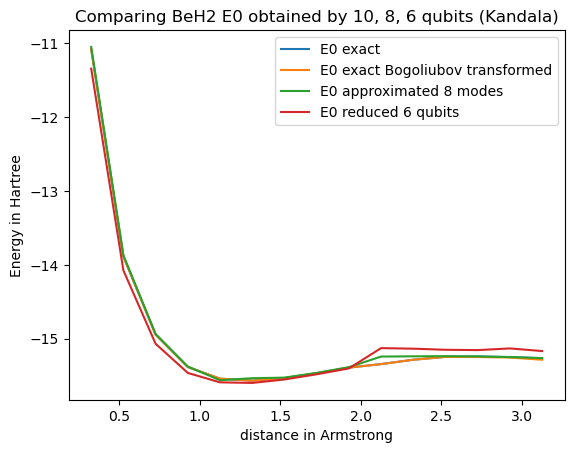

In [100]:
import matplotlib.pyplot as plt

d = [1.326 + n*0.2 for n in range(-5, 10)]
plt.plot(d, e0, label='E0 exact')
plt.plot(d, e0_bogoliubov, label='E0 exact Bogoliubov transformed')
plt.plot(d, e0_approx, label='E0 approximated 8 modes')
plt.plot(d, e0_reduced, label='E0 reduced 6 qubits')
plt.xlabel('distance in Armstrong')
plt.ylabel('Energy in Hartree')
plt.legend()
plt.title('Comparing BeH2 E0 obtained by 10, 8, 6 qubits (Kandala)')
plt.show()